In [1]:
import pandas as pd
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('FineTech_appData.csv')

In [3]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,1,0,NaN
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,2013-07-05 16:11:49.513
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,2013-02-26 18:56:37.841


In [4]:
type(data)

pandas.core.frame.DataFrame

## EDA ##

there is no hour column below as it format seems like a data format

In [4]:
data.describe()

,user,dayofweek,age,numscreens,minigame,liked,used_premium_feature,enrolled
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.165000,0.172020,0.621480
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.371184,0.377402,0.485023
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,0.000000,1.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,0.000000,1.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.head(3) 

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,1,0,NaN


## cleaning

In [6]:
data['hour'] = data.hour.str.slice(1,3).astype(int)

In [7]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,1,0,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,2013-07-05 16:11:49.513
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,2013-02-26 18:56:37.841


##  plotting

In [8]:
dataset2 = data.copy().drop(columns = ['user','first_open', 'screen_list','enrolled_date','enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,1,0


In [9]:
dataset2.shape

(50000, 7)

In [10]:
dataset2.iloc[:, 0].head()


0    3
1    6
2    1
3    4
4    1
Name: dayofweek, dtype: int64

In [11]:
dataset2.columns.values[1]

'hour'

## Histograms

In [12]:
np.size(dataset2.iloc[:, 1])

50000

In [13]:
np.size(dataset2.iloc[:, 1].unique())

24

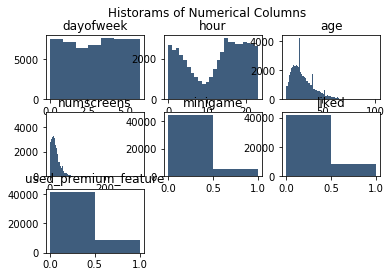

In [14]:
plt.suptitle('Historams of Numerical Columns')
for i in range(1, dataset2.shape[1] + 1 ):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i -1])
    
    vals = np.size(dataset2.iloc[:, i-1].unique())
    
    plt.hist(dataset2.iloc[:, i-1], bins = vals, color = '#3F5D7D' )


##### plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig('app_data_hist.jpg')


## Corelation with response variable

In [15]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,1,0


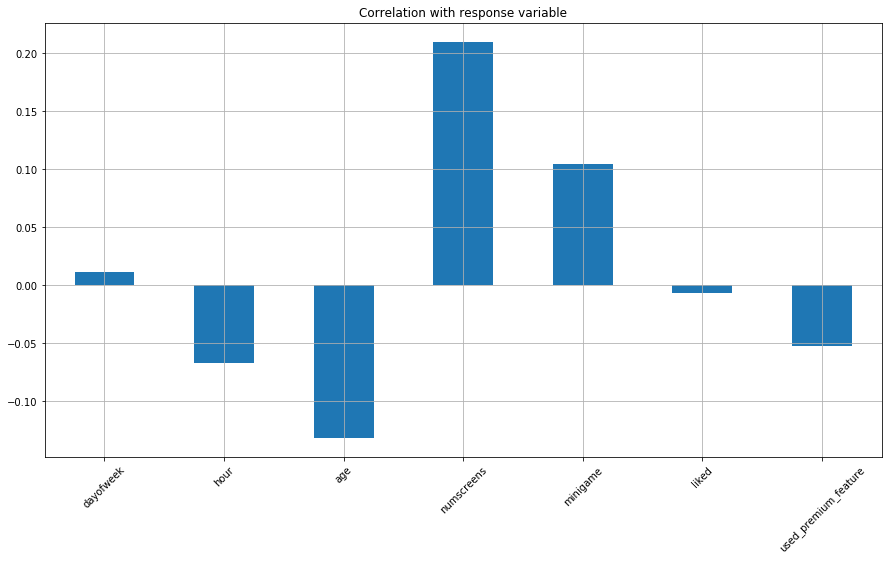

In [16]:
dataset2.corrwith(data.enrolled).plot.bar(figsize = (15,8),
                  title = 'Correlation with response variable',
                   fontsize = 10, rot = 45, grid = True )

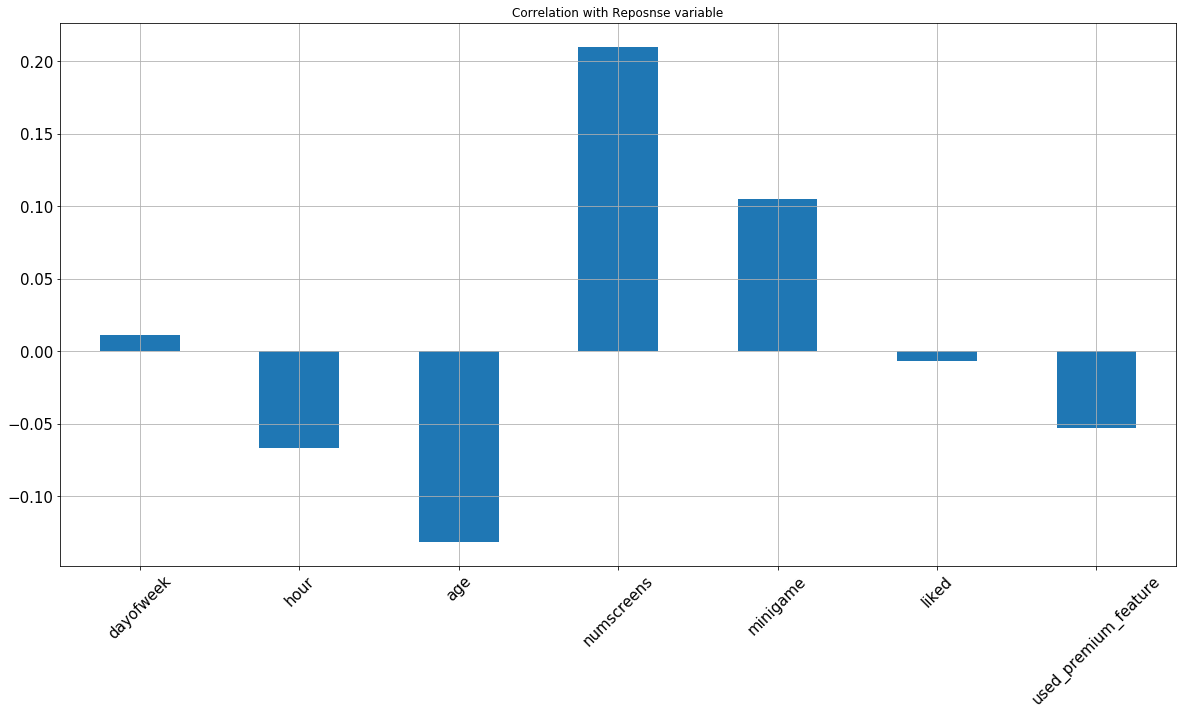

In [17]:
dataset2.corrwith(data.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)


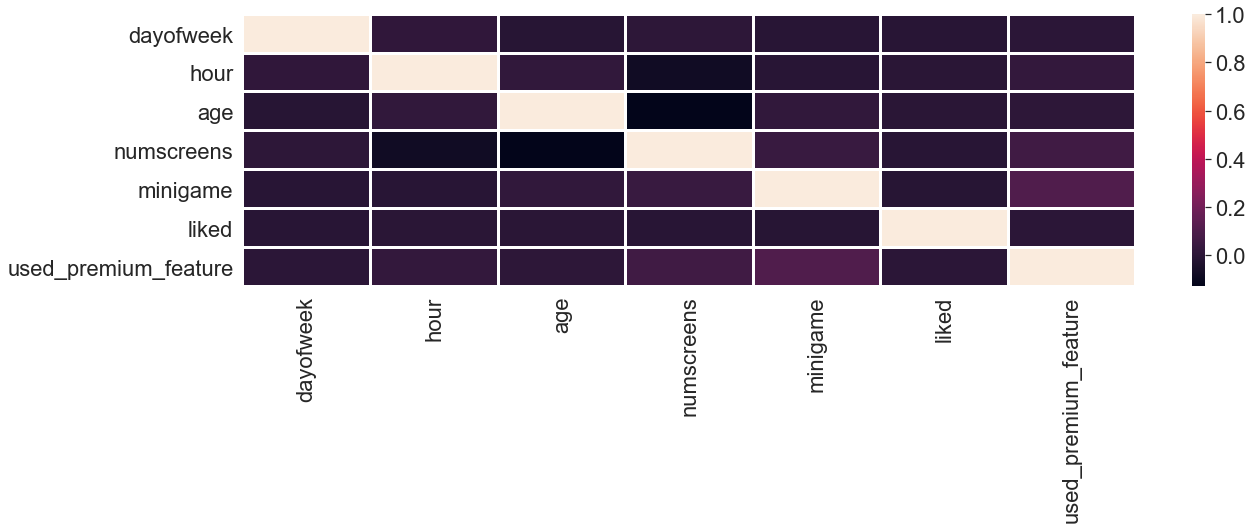

In [18]:
sns.set(style="white", font_scale=2)
plt.subplots(figsize=(20,5))

sns.heatmap(dataset2.corr(), linewidth = 2)

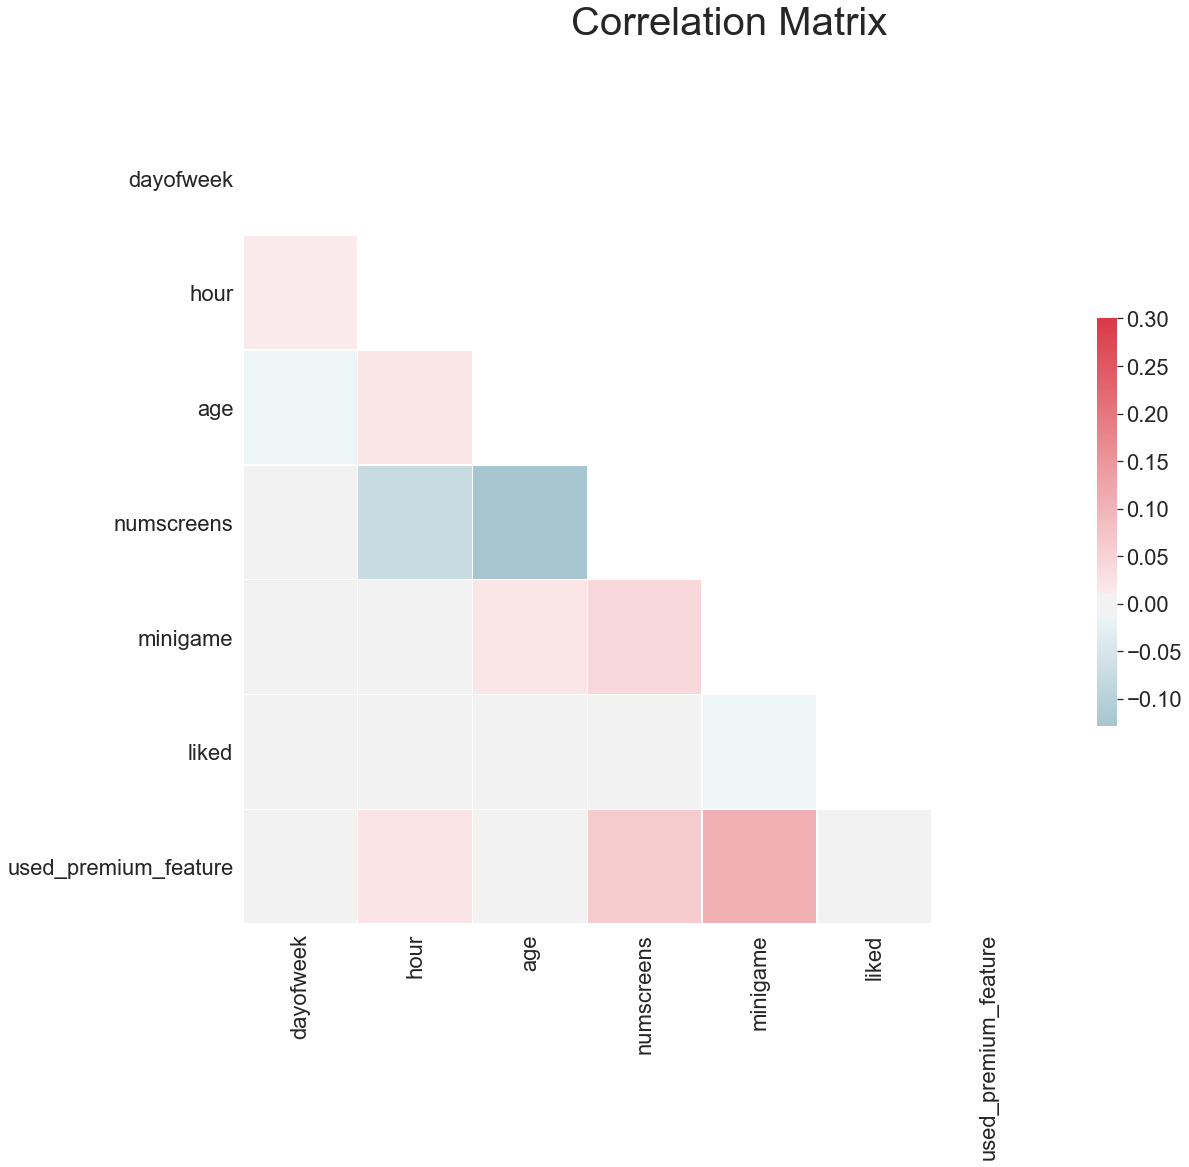

In [19]:
## Correlation Matrix
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


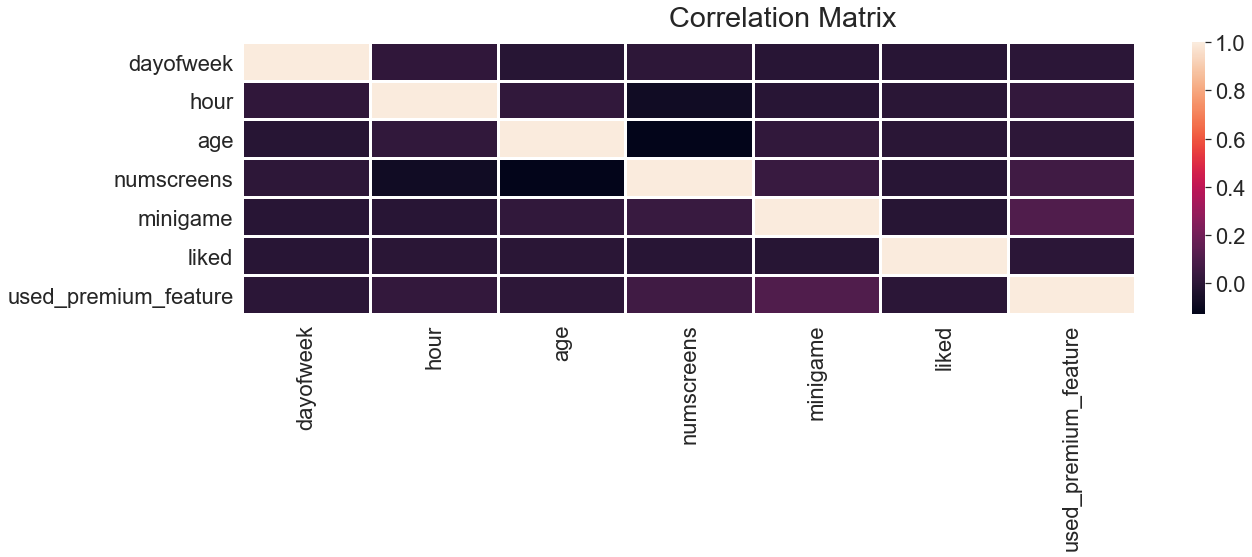

In [20]:
f, ax = plt.subplots(figsize=(20,5))
f.suptitle('Correlation Matrix')
sns.heatmap(dataset2.corr(), linewidth = 2)

# Feature Engineering

## Formatting the date columns

In [21]:
data['first_open'] = [parser.parse(row_data) for row_data in data['first_open']]

In [22]:
data['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in data['enrolled_date']]

In [23]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
liked                            int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
dtype: object

## Selecting the time for response

In [24]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaT
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaT
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,1,0,NaT
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,2013-07-05 16:11:49.513
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,2013-02-26 18:56:37.841


In [25]:
data['difference'] = (data['enrolled_date'] - data['first_open']).astype('timedelta64[h]')
data['difference'].tail()

49995    0.0
49996    NaN
49997    NaN
49998    0.0
49999    NaN
Name: difference, dtype: float64

Text(0.5, 1.0, 'Distribution of Time Since Enrolled')

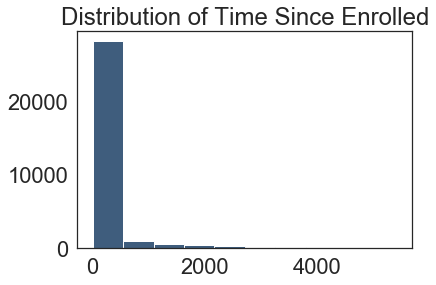

In [26]:
response_hist = plt.hist(data['difference'].dropna(), color='#3F5D7D')
plt.title('Distribution of Time Since Enrolled')

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

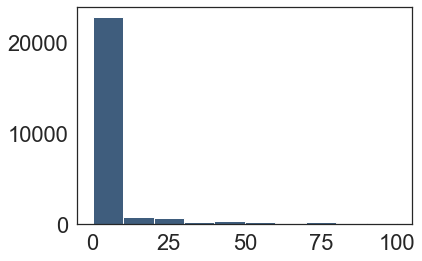

In [27]:
plt.hist(data['difference'].dropna(), color='#3F5D7D', range = [0,100])

In [28]:
data.loc[data['difference']> 48, 'enrolled'] = 0

In [29]:
data = data.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [30]:
data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,1,0
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1


# Formatting the screen list field

In [31]:
## load top screen

In [32]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [33]:
##Mapping screen to fields

In [34]:
data['screen_list'] = data['screen_list'].astype(str) + ','

In [36]:
for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data['screen_list'] = data.screen_list.str.replace(sc +',' , '')

In [37]:
data['others'] = data.screen_list.str.count(',')

In [41]:
data.drop(columns = ['screen_list'], inplace =True)

In [42]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,others
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,10


## Funnels

In [43]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

In [44]:
data['SavingCount'] = data[savings_screens].sum(axis=1)

In [46]:
data = data.drop(columns = savings_screens)

In [47]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
data["CMCount"] = data[cm_screens].sum(axis=1)
data = data.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
data["CCCount"] = data[cc_screens].sum(axis=1)
data = data.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data["LoansCount"] = data[loan_screens].sum(axis=1)
data = data.drop(columns=loan_screens)


## savings results 

In [49]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'liked',
       'used_premium_feature', 'enrolled', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'others',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [50]:
data.to_csv('new_appdata11.csv', index = False)

## see you

In [ ]:
data.head()

In [ ]:
X = data.iloc[:, 1:10].values

In [ ]:
y = data.iloc[:, 10].values

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101 )

In [ ]:
from sklearn.ensemble import RandomForestRegressor